---

#  SPY Multi-Indicators


---

# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
#%matplotlib qt
import pandas as pd
import datetime

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.9b1'

In [4]:
import yfinance as yf

In [5]:
df = yf.download(['ABNB','SPY','PSHG'],period='45d')

df = df.swaplevel(axis=1)
df.head()

[*********************100%***********************]  3 of 3 completed


,ABNB,PSHG,SPY,ABNB,PSHG,SPY,ABNB,PSHG,SPY,ABNB,PSHG,SPY,ABNB,PSHG,SPY,ABNB,PSHG,SPY
,Adj Close,Adj Close,Adj Close,Close,Close,Close,High,High,High,Low,Low,Low,Open,Open,Open,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,
2022-06-13,98.930000,0.67,373.387085,98.930000,0.67,375.000000,105.330002,0.74,381.809998,98.360001,0.66,373.299988,102.849998,0.70,379.850006,9587300,1213200,170004900
2022-06-14,98.870003,0.73,372.261932,98.870003,0.73,373.869995,101.349998,0.95,377.940002,97.200996,0.65,370.589996,99.540001,0.68,376.850006,5915300,7719700,104011800
2022-06-15,101.470001,0.69,377.569031,101.470001,0.69,379.200012,103.650002,0.76,383.899994,98.919998,0.68,372.119995,100.019997,0.71,377.359985,6260400,1313000,125666800
2022-06-16,93.260002,0.69,365.072998,93.260002,0.69,366.649994,97.500000,0.72,370.940002,92.089996,0.65,364.079987,96.190002,0.69,370.510010,9435700,1423300,134473300
2022-06-17,99.489998,0.66,365.859985,99.489998,0.66,365.859985,100.610001,0.68,369.380005,93.529999,0.65,362.170013,93.529999,0.68,365.510010,11288700,829300,111113900


In [6]:
tickers = list(set(df.columns.get_level_values(0)))
tickers
dflist = []
for ticker in tickers:
    ndf = df[ticker].copy()
    ndf['Ticker'] = [ticker]*len(ndf)
    dflist.append(ndf)
nndf = pd.concat(dflist)

['ABNB', 'SPY', 'PSHG']

In [7]:
nndf.reset_index(inplace=True)

In [8]:
nndf['Date'] = [str(d.date()) for d in pd.to_datetime(nndf['Date'])]
df = nndf
type(df['Date'][0])

str

In [9]:
df

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2022-06-13,98.930000,98.930000,105.330002,98.360001,102.849998,9587300,ABNB
1,2022-06-14,98.870003,98.870003,101.349998,97.200996,99.540001,5915300,ABNB
2,2022-06-15,101.470001,101.470001,103.650002,98.919998,100.019997,6260400,ABNB
3,2022-06-16,93.260002,93.260002,97.500000,92.089996,96.190002,9435700,ABNB
4,2022-06-17,99.489998,99.489998,100.610001,93.529999,93.529999,11288700,ABNB
...,...,...,...,...,...,...,...,...
130,2022-08-10,0.520000,0.520000,0.580000,0.410000,0.410000,18449300,PSHG
131,2022-08-11,0.620000,0.620000,0.650000,0.520000,0.620000,18418600,PSHG
132,2022-08-12,0.340000,0.340000,0.360000,0.290000,0.330000,57888700,PSHG
133,2022-08-15,0.360000,0.360000,0.390000,0.340000,0.390000,20920000,PSHG


In [10]:
#df.to_csv('mpf.issue549.csv')
df = pd.read_csv('mpf.issue549.csv')

In [11]:
type(df['Date'][0])
df

str

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2022-06-13,98.930000,98.930000,105.330002,98.360001,102.849998,9587300,ABNB
1,2022-06-14,98.870003,98.870003,101.349998,97.200996,99.540001,5915300,ABNB
2,2022-06-15,101.470001,101.470001,103.650002,98.919998,100.019997,6260400,ABNB
3,2022-06-16,93.260002,93.260002,97.500000,92.089996,96.190002,9435700,ABNB
4,2022-06-17,99.489998,99.489998,100.610001,93.529999,93.529999,11288700,ABNB
...,...,...,...,...,...,...,...,...
130,2022-08-10,419.989990,419.989990,420.140015,416.720001,418.779999,68665700,SPY
131,2022-08-11,419.989990,419.989990,424.950012,419.209991,422.989990,59489700,SPY
132,2022-08-12,427.100006,427.100006,427.209991,421.029999,422.029999,61644600,SPY
133,2022-08-15,428.859985,428.859985,429.410004,424.709991,424.769989,54048300,SPY


In [12]:
df['Ticker'].unique()

array(['ABNB', 'PSHG', 'SPY'], dtype=object)

In [13]:
type(df['Date'][0])
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])
df

str

pandas._libs.tslibs.timestamps.Timestamp

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,2022-06-13,98.930000,98.930000,105.330002,98.360001,102.849998,9587300,ABNB
1,2022-06-14,98.870003,98.870003,101.349998,97.200996,99.540001,5915300,ABNB
2,2022-06-15,101.470001,101.470001,103.650002,98.919998,100.019997,6260400,ABNB
3,2022-06-16,93.260002,93.260002,97.500000,92.089996,96.190002,9435700,ABNB
4,2022-06-17,99.489998,99.489998,100.610001,93.529999,93.529999,11288700,ABNB
...,...,...,...,...,...,...,...,...
130,2022-08-10,419.989990,419.989990,420.140015,416.720001,418.779999,68665700,SPY
131,2022-08-11,419.989990,419.989990,424.950012,419.209991,422.989990,59489700,SPY
132,2022-08-12,427.100006,427.100006,427.209991,421.029999,422.029999,61644600,SPY
133,2022-08-15,428.859985,428.859985,429.410004,424.709991,424.769989,54048300,SPY


In [14]:
df.set_index(['Ticker','Date'],inplace=True)

In [15]:
df

Adj Close       Close        High         Low        Open  \
Ticker Date                                                                     
ABNB   2022-06-13   98.930000   98.930000  105.330002   98.360001  102.849998   
       2022-06-14   98.870003   98.870003  101.349998   97.200996   99.540001   
       2022-06-15  101.470001  101.470001  103.650002   98.919998  100.019997   
       2022-06-16   93.260002   93.260002   97.500000   92.089996   96.190002   
       2022-06-17   99.489998   99.489998  100.610001   93.529999   93.529999   
...                       ...         ...         ...         ...         ...   
SPY    2022-08-10  419.989990  419.989990  420.140015  416.720001  418.779999   
       2022-08-11  419.989990  419.989990  424.950012  419.209991  422.989990   
       2022-08-12  427.100006  427.100006  427.209991  421.029999  422.029999   
       2022-08-15  428.859985  428.859985  429.410004  424.709991  424.769989   
       2022-08-16  429.700012  429.700012  431.730011  426.880005  427.730011   

                     Volume  
Ticker Date                  
ABNB   2022-06-13   9587300  
       2022-06-14   5915300  
       2022-06-15   6260400  
       2022-06-16   9435700  
       2022-06-17  11288700  
...                     ...  
SPY    2022-08-10  68665700  
       2022-08-11  59489700  
       2022-08-12  61644600  
       2022-08-15  54048300  
       2022-08-16  57589116  

[135 rows x 6 columns]

In [16]:
df.loc['PSHG'].head()
df.loc['PSHG'].tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-06-13,0.67,0.67,0.74,0.66,0.70,1213200
2022-06-14,0.73,0.73,0.95,0.65,0.68,7719700
2022-06-15,0.69,0.69,0.76,0.68,0.71,1313000
2022-06-16,0.69,0.69,0.72,0.65,0.69,1423300
2022-06-17,0.66,0.66,0.68,0.65,0.68,829300


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-08-10,0.5200,0.5200,0.58,0.410,0.410,18449300
2022-08-11,0.6200,0.6200,0.65,0.520,0.620,18418600
2022-08-12,0.3400,0.3400,0.36,0.290,0.330,57888700
2022-08-15,0.3600,0.3600,0.39,0.340,0.390,20920000
2022-08-16,0.3567,0.3567,0.36,0.341,0.355,8429539


In [17]:
import mplfinance as mpf

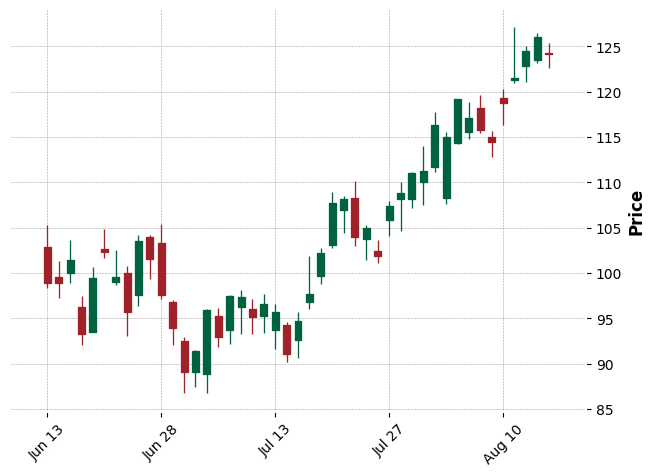

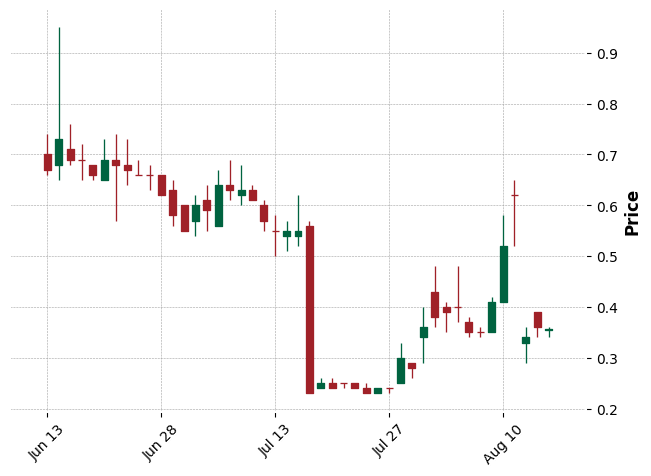

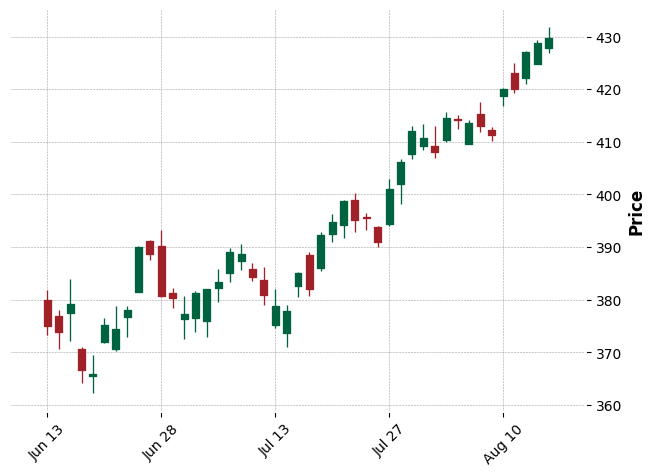

In [18]:
for ticker in ['ABNB', 'PSHG', 'SPY']:
    mpf.plot(df.loc[ticker],type='candle',style='charles')